# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ML_Venkat/Assignments/Delivery_Starter/porter_data_1.csv')
df.info()
df.shape

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance          

(175777, 14)

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()
porter1_df=df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type

porter1_df['store_primary_category'] = porter1_df['store_primary_category'].astype('category')
porter1_df['order_protocol'] = porter1_df['order_protocol'].astype('category')
porter1_df.info()
porter1_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes

## time taken to deliver = delivery_time - order created time
## convert into second and then minutes
porter1_df['time_taken_to_deliver'] = (porter1_df['actual_delivery_time'] - porter1_df['created_at']).dt.total_seconds()/60
print(porter1_df.head(5) )
porter1_df.describe()

   market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  to

market_id                     created_at  \
count  175777.000000                         175777   
mean        2.743726  2015-02-04 19:57:50.009631744   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:19   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:32   
max         6.000000            2015-02-18 06:00:44   
std         1.330963                            NaN   

                actual_delivery_time    total_items       subtotal  \
count                         175777  175777.000000  175777.000000   
mean   2015-02-04 20:44:02.190406144       3.204976    2697.111147   
min              2015-01-21 16:07:03       1.000000       0.000000   
25%              2015-01-29 02:16:30       2.000000    1412.000000   
50%              2015-02-05 03:34:33       3.000000    2224.000000   
75%              2015-02-12 01:48:24       4.000000    3410.000000   
max              2015-02-18 06:51:10     411.000000   26800.000000   
std                              NaN       2.674055    1828.554893   

       num_distinct_items  min_item_price  max_item_price  \
count       175777.000000   175777.000000   175777.000000   
mean             2.675060      684.965433     1160.158616   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      799.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      942.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   
std              1.625681      519.882924      560.828571   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   
std                34.544724           32.168505                 52.731043   

            distance  time_taken_to_deliver  
count  175777.000000          175777.000000  
mean       21.843090              46.203013  
min         0.000000              32.000000  
25%        15.360000              39.000000  
50%        21.760000              45.000000  
75%        28.120000              52.000000  
max        83.520000             110.000000  
std         8.748712               9.327424

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp

## Hour_of_order - New feature which indicates hour of the day at which order was created , it is derived from 'created_at' features
porter1_df['Hour_of_order'] = porter1_df['created_at'].dt.hour

## Day_of_week - New feature which indicates week of the day at which order was created , it is derived from 'created_at' features
## 0 - Monday , 1 - Tuesday , 2 - Wednesday , 3 - Thursday , 4 - Friday , 5 - Saturday , 6 - Sunday
porter1_df['Day_of_week'] = porter1_df['created_at'].dt.dayofweek


# Create a categorical feature 'isWeekend'

## is_weekend - New feature which indicates if order was placed on week day or weekend , value of this feature is derived from derived Day_of_week feature created above
##porter1_df['is_weekend'] = porter1_df['Day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
porter1_df['is_weekend'] = porter1_df['Day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

porter1_df.head(1)

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   

   total_outstanding_orders  distance  time_taken_to_deliver  Hour_of_order  \
0                      21.0     34.44                   47.0             22   

   Day_of_week  is_weekend  
0            4           0

In [7]:
# Drop unnecessary columns

## We have derived new features from 'actual_delivery_time' and 'created_at'. We will not use original features hence we will drop them
## The features 'max_item_price' and 'min_item_price' will not have impact on delivery time hence we will drop them
porter1_df=porter1_df.drop('created_at',axis=1).drop('actual_delivery_time',axis=1).drop('max_item_price',axis=1).drop('min_item_price',axis=1)
#.drop('Day_of_week_string', axis=1)
porter1_df.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
0        1.0                      4            1.0            4      3441   
1        2.0                     46            2.0            1      1900   
2        2.0                     36            3.0            4      4771   
3        1.0                     38            1.0            1      1525   
4        1.0                     38            1.0            2      3620   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                   33.0                14.0   
1                   1                    1.0                 2.0   
2                   3                    8.0                 6.0   
3                   1                    5.0                 6.0   
4                   2                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_to_deliver  Hour_of_order  \
0                      21.0     34.44                   47.0             22   
1                       2.0     27.60                   44.0             21   
2                      18.0     11.56                   55.0              0   
3                       8.0     31.80                   59.0              3   
4                       7.0      8.20                   46.0              2   

   Day_of_week  is_weekend  
0            4           0  
1            1           0  
2            0           0  
3            3           0  
4            1           0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)
porter1_df.columns

porter1_df_tmp = porter1_df.copy()

y=porter1_df_tmp['time_taken_to_deliver']
X=porter1_df_tmp.drop('time_taken_to_deliver',axis=1)
X.describe()
y.describe()

count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken_to_deliver, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [9]:
# Split data into training and testing sets

## import train_test_split
from sklearn.model_selection import train_test_split

## Split : Use 80% dataset for training and 20% for validation
porter1_df_train, porter1_df_test = train_test_split(porter1_df, train_size = 0.8, test_size = 0.2, random_state = 100, shuffle = True)

print("Whole Dataset shape:")
print(porter1_df.shape)
print("Training Dataset shape:")
print(porter1_df_train.shape)
print("Validation Dataset shape:")
print(porter1_df_test.shape)

Whole Dataset shape:
(175777, 14)
Training Dataset shape:
(140621, 14)
Validation Dataset shape:
(35156, 14)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation

## Quantitative Columns are considered as a numeric and rest are categorical
## porter1_df_numcols is series containing names of numeric columns/variables/features
porter1_df_numcols = ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken_to_deliver']
## porter1_df_catcols is series containing names of categorical columns/variables/features
porter1_df_catcols = ['market_id', 'store_primary_category', 'order_protocol', 'Hour_of_order', 'Day_of_week', 'is_weekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [11]:
# Plot distributions for all numerical columns

## Plotting
sns.pairplot(porter1_df_train[porter1_df_numcols])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

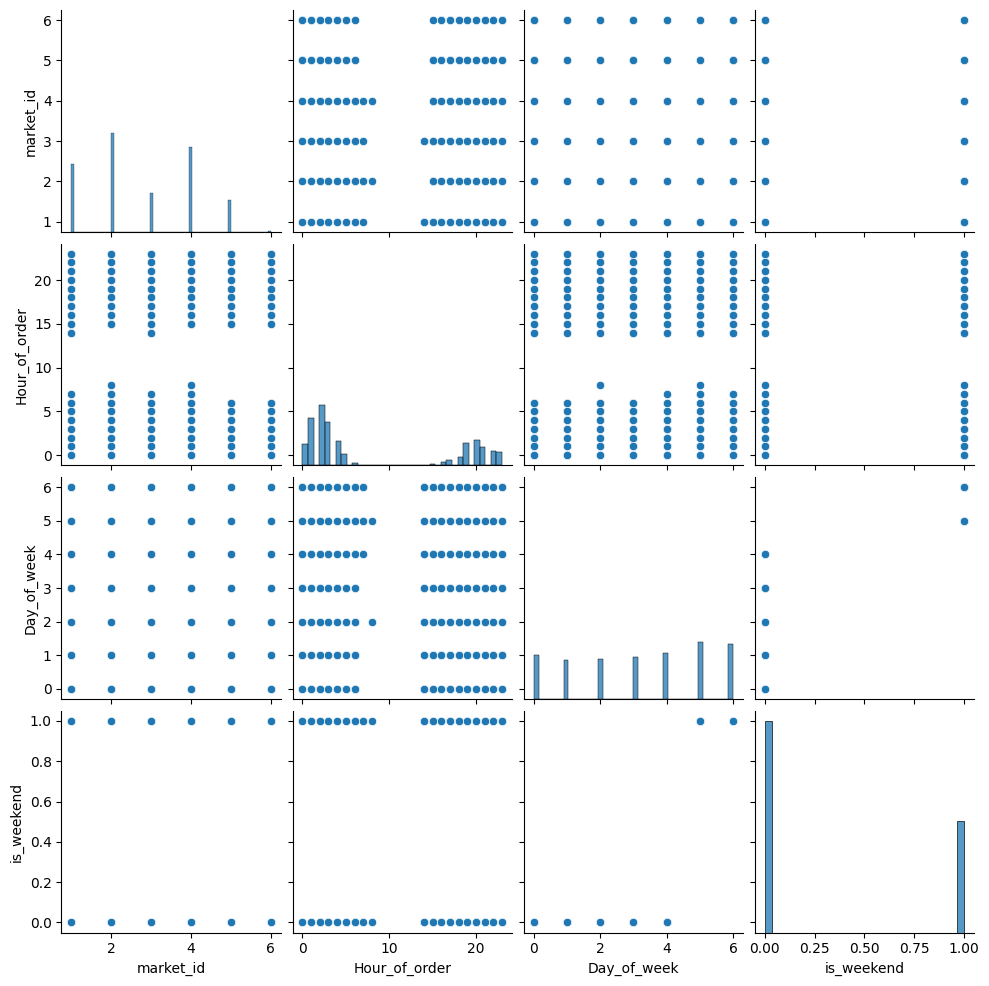

In [12]:
# Distribution of categorical columns

sns.pairplot(porter1_df_train[porter1_df_catcols])
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

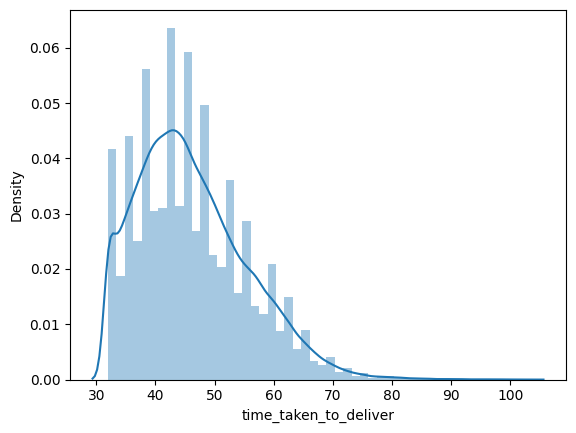

In [13]:
# Distribution of time_taken

## 'time_taken_to_deliver' is a target variable
sns.distplot(porter1_df_train['time_taken_to_deliver'])
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

Relationship between time_taken and other columns/features


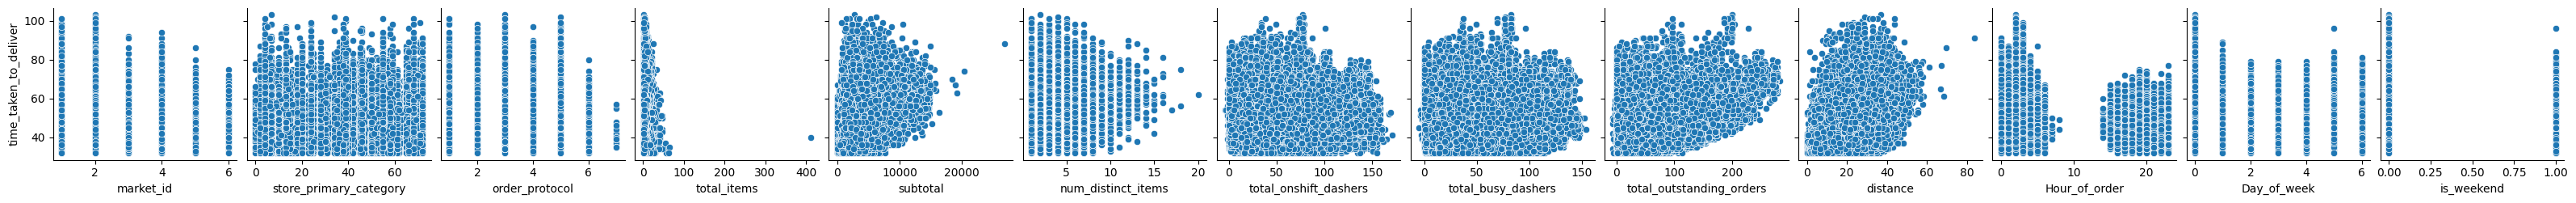

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features

## 'time_taken_to_deliver' is a target variable i.e. time_taken
print("Relationship between time_taken and other columns/features")
sns.pairplot(data=porter1_df_train, x_vars=X.columns, y_vars='time_taken_to_deliver', kind='scatter')
plt.show()


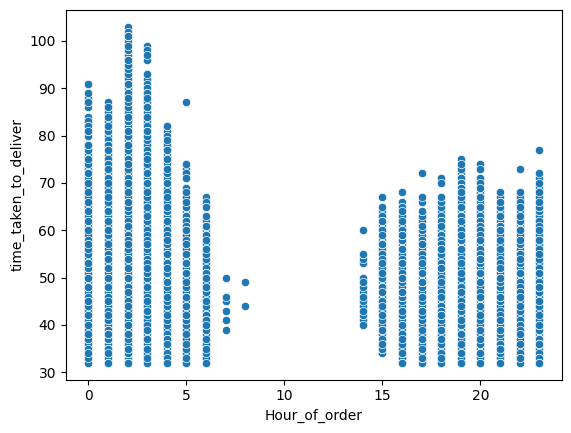

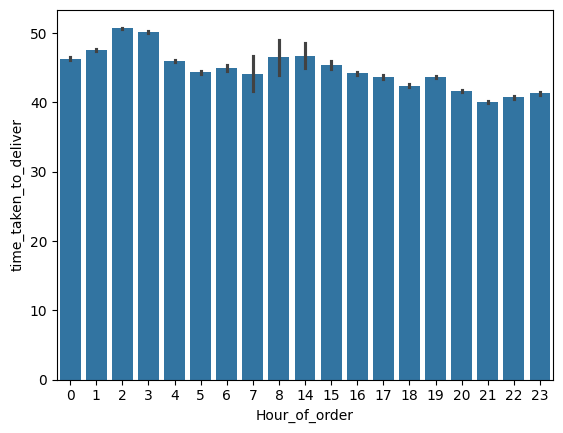

market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0            1      1350   

       num_distinct_items  total_onshift_dashers  total_busy_dashers  \
42111                   1                   23.0                20.0   

       total_outstanding_orders  distance  time_taken_to_deliver  \
42111                      19.0       9.6                   32.0   

       Hour_of_order  Day_of_week  is_weekend  
42111             20            0           0

In [15]:
# Show the distribution of time_taken for different hours

## 'time_taken_to_deliver' is a target variable (i.e. time_taken) ,
## 'Hour_of_order' was derived from 'created_at' which indicates hour at which order was placed

sns.scatterplot(x='Hour_of_order', y='time_taken_to_deliver', data=porter1_df_train)
plt.show()

## ** to review use of this chart **
sns.barplot(x='Hour_of_order', y='time_taken_to_deliver', data=porter1_df_train, orient='v')
plt.show()

porter1_df_train.head(1)

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

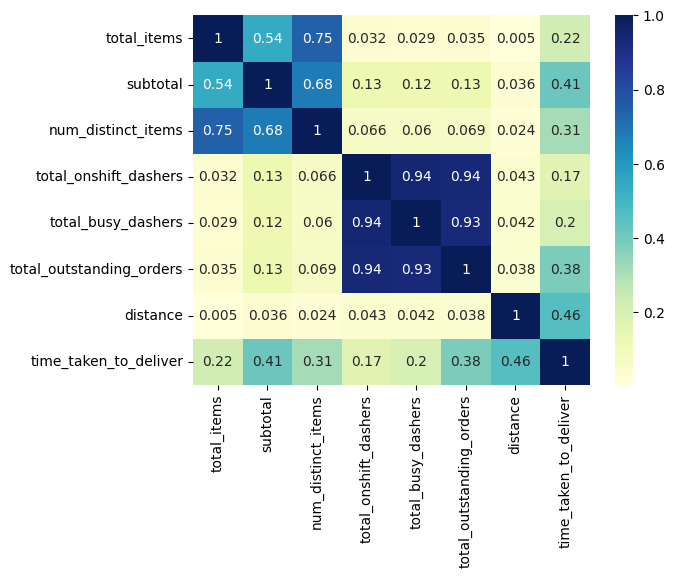

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  float64 
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   total_onshift_dashers     140621 non-null  float64 
 7   total_busy_dashers        140621 non-null  float64 
 8   total_outstanding_orders  140621 non-null  float64 
 9   distance                  140621 non-null  float64 
 10  time_taken_to_deliver     140621 non-null  float64 
 11  Hour_of_order             140621 non-null  int32   
 12  Day_of_week               140621 non-null  int32   
 13  is_weekend                14062

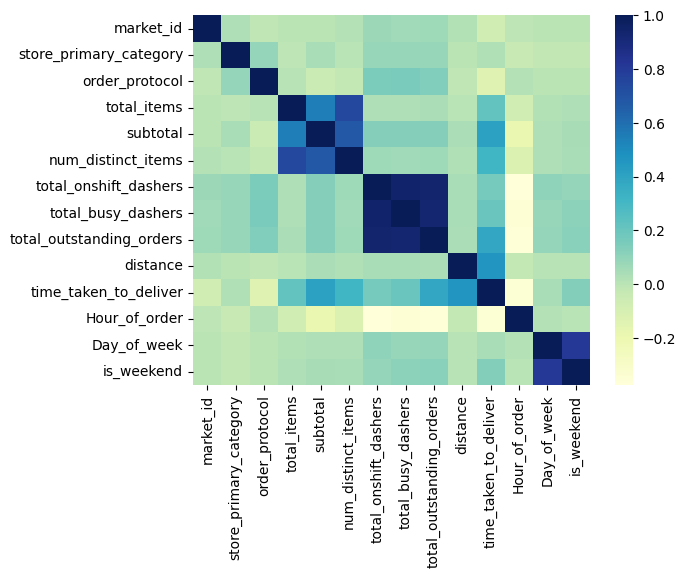

In [16]:
# Plot the heatmap of the correlation matrix

## porter1_df_train_num is a dataframe created from training dataframe which includes only numeric variables
##      porter1_df_numcols is series containing names of numeric columns/variables/features
porter1_df_train_num = porter1_df_train[porter1_df_numcols]

## Lets Plot the heatmap of the correlation matrix ( only for numeric features)
sns.heatmap(porter1_df_train_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Lets Plot the heatmap of the correlation matrix ( including all the features)
porter1_df_train_all = porter1_df_train
porter1_df_train_all.info()
sns.heatmap(porter1_df_train_all.corr(), annot = False, cmap="YlGnBu")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [17]:
# Drop 3-5 weakly correlated columns from training dataset

## porter1_df_train_num is training dataset DF containing only numeric columns
## Lets display correlation table ( only for numeric features)
porter1_df_train_num.corr()

## correlation_with_y is a series containing corelation of each feature with target variable/feature 'time_taken_to_deliver'
correlation_with_y = porter1_df_train_num.corrwith(porter1_df_train_num['time_taken_to_deliver'])

## Lets extract column names which are highly co-related
## steps - 1. sort correlation_with_y by values (i.e. corelation value)
##         2. Pickup all but last 3 column names
## highly_corelated is a series of column names which are highly corelated with target variable 'time_taken_to_deliver'
highly_corelated = correlation_with_y.sort_values( ascending=False)[:-3]

## Lets display highly co-related column names
highly_corelated





time_taken_to_deliver       1.000000
distance                    0.460237
subtotal                    0.413293
total_outstanding_orders    0.382738
num_distinct_items          0.312917
dtype: float64

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')
         total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        3.204358    2697.092604            2.673548   
std         2.718707    1830.073210            1.624359   
min         1.000000       0.000000            1.000000   
25%         2.000000    1415.000000            1.000000   
50%         3.000000    2220.000000            2.000000   
75%         4.000000    3407.000000            3.000000   
max       411.000000   26800.000000           20.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.947184           41.854303                 58.231374   
std                34.555492           32.141913                 52.668677   
min                 0.000000            0.00

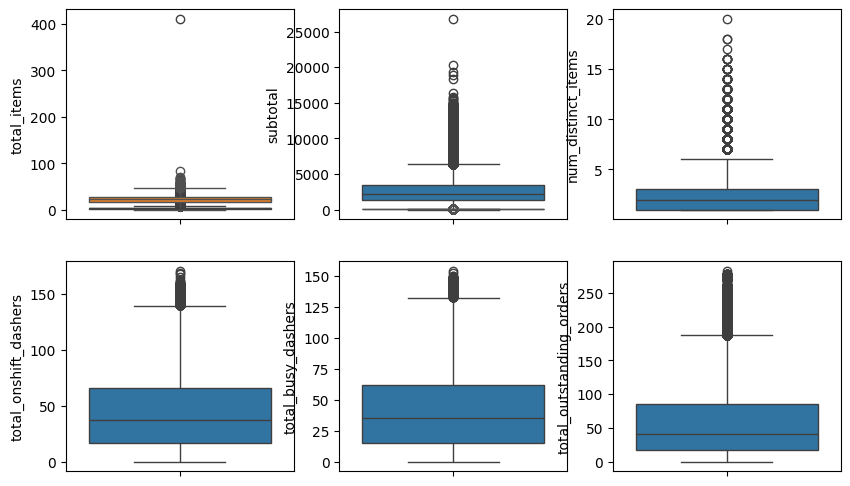

In [18]:
# Boxplot for time_taken

## Before plotting box charts handle negative values

porter1_df_train[porter1_df_catcols].describe()
##There does not seem to be BAD values in the categorical column values

## Lets handle negative values in numeric columns
negative_numcols = porter1_df_train[porter1_df_numcols].columns[(porter1_df_train[porter1_df_numcols] < 0).any()]
print(negative_numcols)

## There are negative values for columns listed in negative_numcols , replce them by absolute value
porter1_df_train[negative_numcols] = porter1_df_train[negative_numcols].abs()
print(porter1_df_train[porter1_df_numcols].describe())

## Function to display boxplots
def show_boxplots(porter1_df_numcols, porter1_df_train):
  plt.figure(figsize=(10,6))
  num_cols = len(porter1_df_numcols)
  ival=0
  for xi in range(num_cols):
    ival=(ival+1)%7
    ival = 1 if ival == 0 else ival
    colname=porter1_df_numcols[xi]
    plt.subplot(2,3,ival)
    sns.boxplot(porter1_df_train[colname])
  plt.rcParams['figure.constrained_layout.use'] = True
  plt.show()



## Lets see boxplot of the features BEFORE removing outliers
show_boxplots(porter1_df_numcols, porter1_df_train)



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

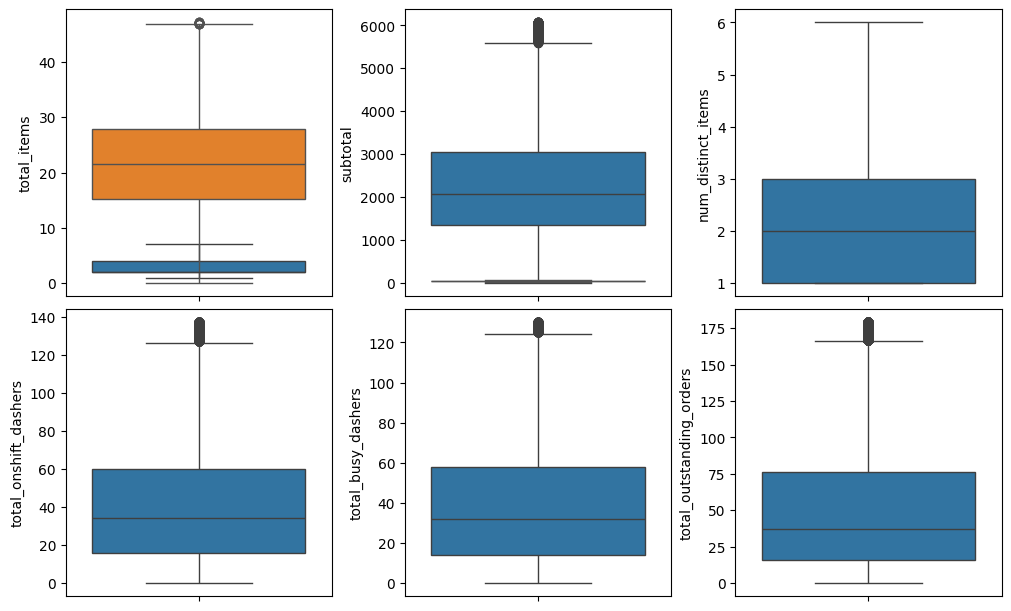

In [19]:
# Handle outliers

## Function to remove outlier for the given feature
def removeOutlier(porter1_df_train, featurename):
  ## tmpdf
  tmpdf = porter1_df_train.copy()
  ## Calculate the 1st & 3rd quartile
  q1val = np.quantile(tmpdf[featurename], 0.25)
  q3val = np.quantile(tmpdf[featurename], 0.75)
  ## Calculate iqr
  iqrval = q3val-q1val
  ## Calculate upper and lower bound values (thresholds)
  UThreshold = q3val+(1.5*iqrval)
  LThreshold = q1val-(1.5*iqrval)
  ## Remove entried with value >=LThreshold and  <=  UThreshold
  tmpdf = tmpdf[ (tmpdf[featurename] >= LThreshold) & (tmpdf[featurename] <= UThreshold) ]
  return tmpdf;

## Remove outliers
num_cols = len(porter1_df_numcols)
ival=0
for xi in range(num_cols):
  colname=porter1_df_numcols[xi]
  porter1_df_train = removeOutlier(porter1_df_train , colname)

## Lets see boxplot of the features AFTER removing outliers
show_boxplots(porter1_df_numcols, porter1_df_train)



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation

## Quantitative Columns are considered as a numeric and rest are categorical
## porter1_df_numcols is series containing names of numeric columns/variables/features
porter1_df_numcolnames = ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken_to_deliver']
## porter1_df_catcols is series containing names of categorical columns/variables/features
porter1_df_catcolnames = ['market_id', 'store_primary_category', 'order_protocol', 'Hour_of_order', 'Day_of_week', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [21]:
# Plot distributions for all numerical columns

## Plotting distributions
sns.pairplot(porter1_df_test[porter1_df_numcolnames])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### **4.1.2**
Check the distribution of categorical features

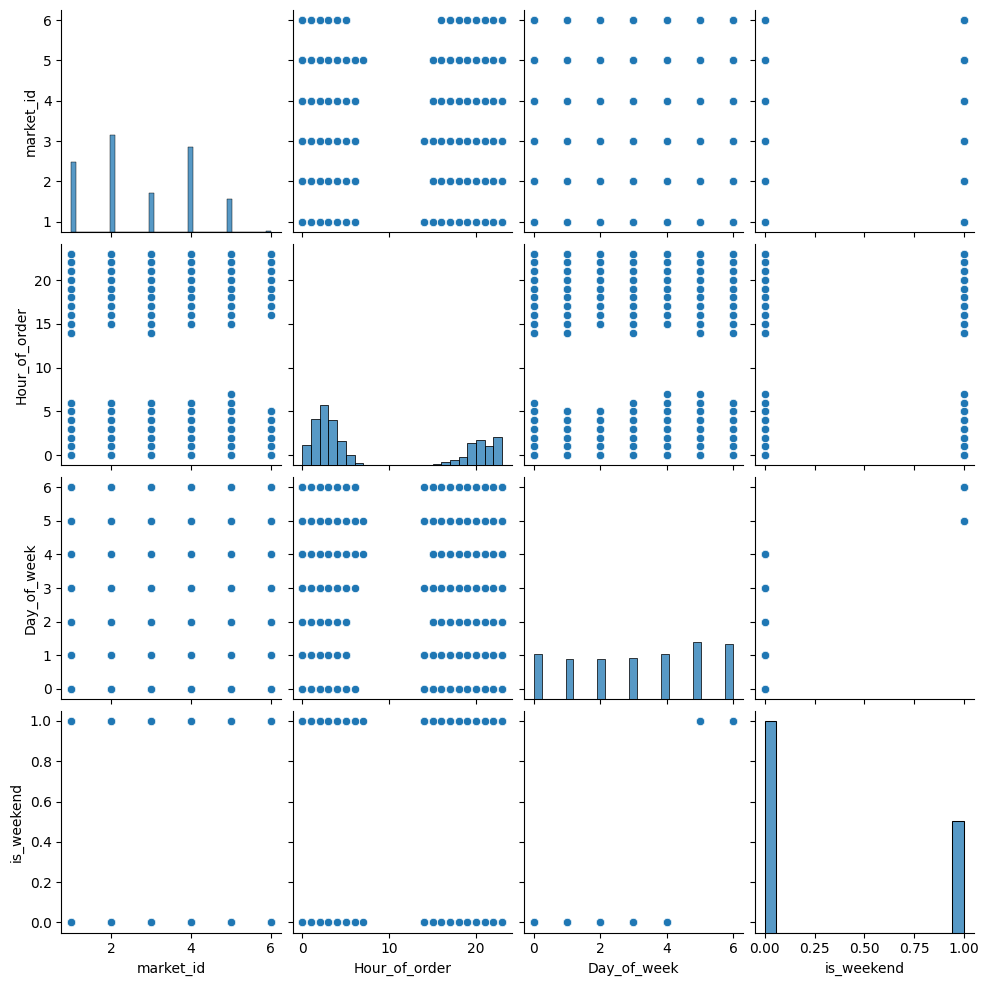

In [22]:
# Distribution of categorical columns

sns.pairplot(porter1_df_test[porter1_df_catcolnames])
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

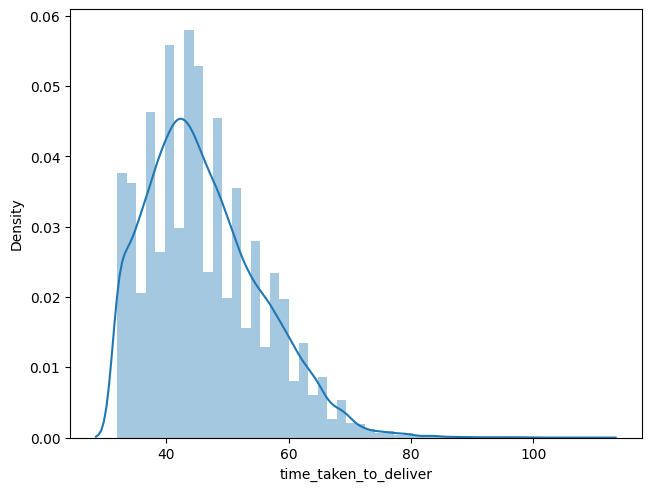

In [23]:
# Distribution of time_taken

## 'time_taken_to_deliver' is a target variable
sns.distplot(porter1_df_test['time_taken_to_deliver'])
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

Relationship between time_taken and other columns/features


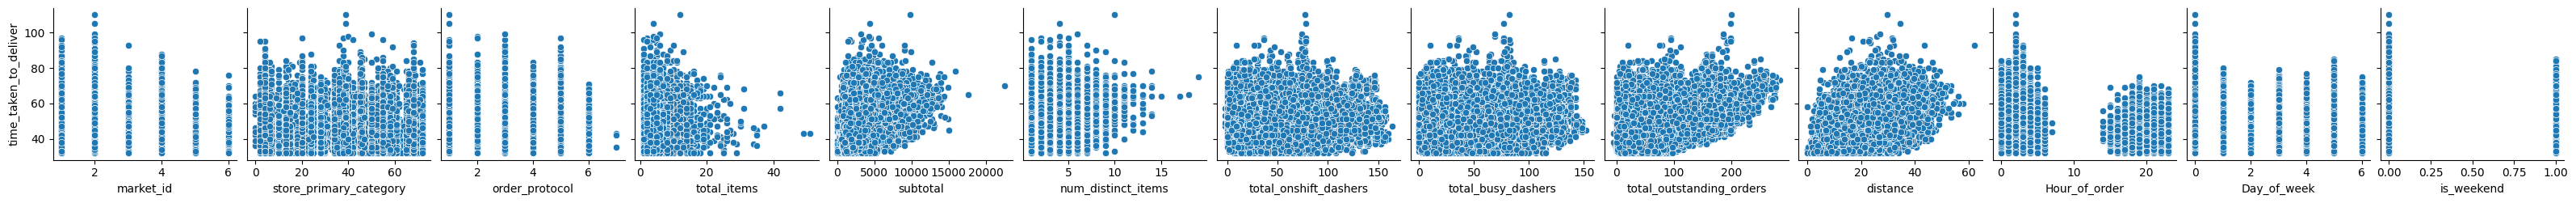

In [24]:
# Scatter plot to visualise the relationship between time_taken and other features

## 'time_taken_to_deliver' is a target variable i.e. time_taken
print("Relationship between time_taken and other columns/features")
sns.pairplot(data=porter1_df_test, x_vars=X.columns, y_vars='time_taken_to_deliver', kind='scatter')
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [25]:
# Drop the weakly correlated columns from training dataset

## Already dropped weakly correlated columns from training dataset
## Lets display highly co-related column names
highly_corelated


time_taken_to_deliver       1.000000
distance                    0.460237
subtotal                    0.413293
total_outstanding_orders    0.382738
num_distinct_items          0.312917
dtype: float64

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [26]:
# Import libraries

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [27]:
# Apply scaling to the numerical columns

## Lets use MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
interestcnumcols = pd.Series(highly_corelated.index.to_series().unique())
interestcnumcols = interestcnumcols[interestcnumcols != 'time_taken_to_deliver']
print(interestcnumcols)
porter1_df_train[interestcnumcols] = scaler1.fit_transform(porter1_df_train[interestcnumcols])
porter1_df_train[porter1_df_catcols] = scaler2.fit_transform(porter1_df_train[porter1_df_catcols])
porter1_df_train.head()

1                    distance
2                    subtotal
3    total_outstanding_orders
4          num_distinct_items
dtype: object


market_id  store_primary_category  order_protocol  total_items  \
42111         0.4                0.097222        0.166667            1   
79735         0.6                0.625000        0.166667            3   
80691         0.4                0.333333        0.500000            4   
170910        0.4                0.055556        0.666667            1   
64999         0.4                0.763889        0.500000            2   

        subtotal  num_distinct_items  total_onshift_dashers  \
42111   0.222405                 0.0                   23.0   
79735   0.602965                 0.4                  127.0   
80691   0.089951                 0.6                    1.0   
170910  0.260132                 0.0                    6.0   
64999   0.354201                 0.0                   25.0   

        total_busy_dashers  total_outstanding_orders  distance  \
42111                 20.0                  0.106145  0.203562   
79735                106.0                  0.966480  0.546226   
80691                  1.0                  0.000000  0.547074   
170910                13.0                  0.117318  0.112807   
64999                 25.0                  0.156425  0.626802   

        time_taken_to_deliver  Hour_of_order  Day_of_week  is_weekend  
42111                    32.0       0.869565     0.000000         0.0  
79735                    54.0       0.086957     0.833333         1.0  
80691                    44.0       0.608696     0.166667         0.0  
170910                   45.0       0.173913     0.000000         0.0  
64999                    48.0       0.086957     1.000000         1.0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [28]:
# Create/Initialise the model

porter1_df_train.describe()

## Separate Xtrain and ytrain (Y is target variable)

y_train = porter1_df_train.pop('time_taken_to_deliver')
X_train = porter1_df_train[interestcnumcols]
X_train[porter1_df_catcols] = porter1_df_train[porter1_df_catcols]
X_train.describe()

model = sm.OLS(y_train, X_train)


In [29]:
# Train the model using the training data

model = sm.OLS(y_train, X_train)
# Create a first fitted model
#lr = sm.OLS(y_train, X_train).fit()
lr = model.fit()
print(lr.params)
print(lr.summary())


distance                    40.581906
subtotal                    23.541678
total_outstanding_orders    12.171729
num_distinct_items           2.153410
market_id                    3.787851
store_primary_category       7.887634
order_protocol               1.129703
Hour_of_order                3.181429
Day_of_week                 10.048018
is_weekend                  -2.443721
dtype: float64
                                  OLS Regression Results                                  
Dep. Variable:     time_taken_to_deliver   R-squared (uncentered):                   0.959
Model:                               OLS   Adj. R-squared (uncentered):              0.959
Method:                    Least Squares   F-statistic:                          2.858e+05
Date:                   Mon, 28 Apr 2025   Prob (F-statistic):                        0.00
Time:                           07:13:26   Log-Likelihood:                     -4.4011e+05
No. Observations:                 121248   AIC:            

Index(['total_onshift_dashers', 'total_outstanding_orders'], dtype='object')


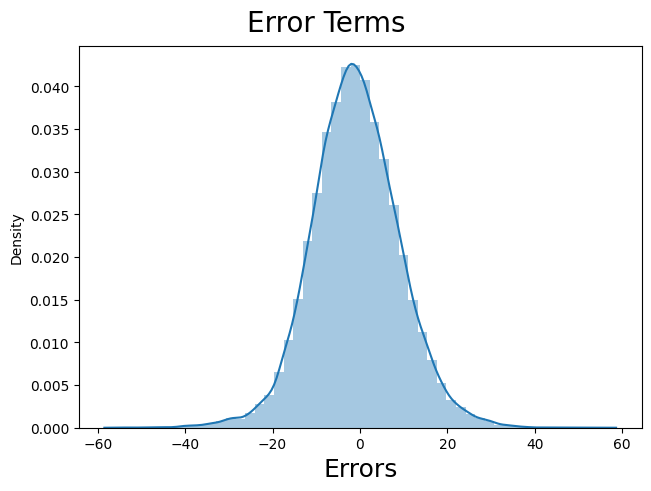

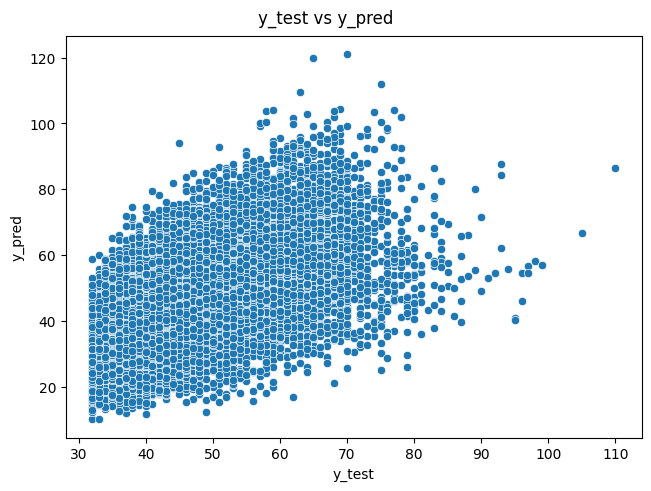

In [30]:
# Make predictions

porter1_df_test.describe()

porter1_df_test.head(1)


## Lets remove negative values from validation set
negative_numcols = porter1_df_test[porter1_df_numcols].columns[(porter1_df_test[porter1_df_numcols] < 0).any()]
print(negative_numcols)
## There are negative values for columns listed in negative_numcols , replce them by absolute value
porter1_df_test[negative_numcols] = porter1_df_test[negative_numcols].abs()


## SCALE TEST dataset
porter1_df_test[interestcnumcols] = scaler1.transform(porter1_df_test[interestcnumcols])
porter1_df_test[porter1_df_catcols] = scaler2.transform(porter1_df_test[porter1_df_catcols])

## Separate Xtest and ytest (Y is target variable)
y_test = porter1_df_test.pop('time_taken_to_deliver')
X_test = porter1_df_test[interestcnumcols]
X_test[porter1_df_catcols] = porter1_df_test[porter1_df_catcols]
X_test.describe()


## Lets use predict function to predict Y values on validation dataset
y_test_pred = lr.predict(X_test)

## Lets display error (real y value Vs predicted y value)
fig = plt.figure()
sns.distplot((y_test_pred - y_test )) #, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Lets display few ypred and yactual
fig = plt.figure()
result_df = pd.DataFrame(y_test, y_test_pred);
sns.scatterplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 12)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

mae =  7.849026074259795
mse =  101.94735951279354
rmse =  10.096898509581719
<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   distance                  35156 non-null  float64
 1   subtotal                  35156 non-null  float64
 2   total_outstanding_orders  35156 non-null  float64
 3   num_distinct_items        35156 non-null  float64
 4   market_id                 35156 non-null  float64
 5   store_primary_category    35156 non-null  float64
 6   order_protocol            35156 non-null  float64
 7   Hour_of_order             35156 non-null  float64
 8   Day_of_week               35156 non-null  float64
 9   is_weekend                35156 non-null  float64
dtypes: float64(10)
memory usage: 4.0 MB


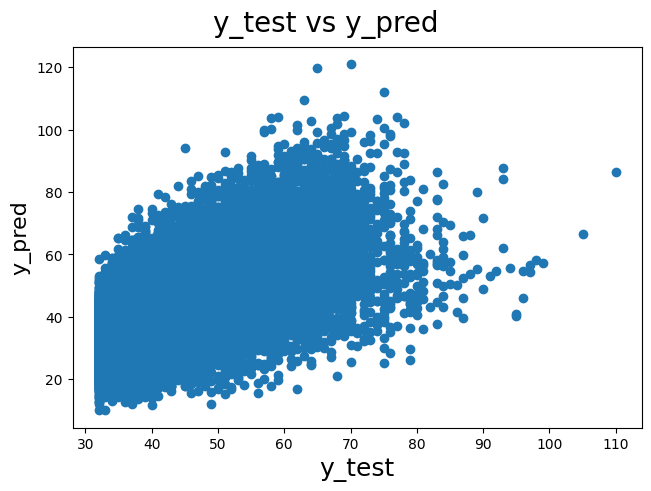

In [31]:
# Find results for evaluation metrics


## Lets display model summary
lr.summary()

## Import necessary libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

## Lets find mean absolute error , squared error r-squared values
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("mae = ",mae)
print("mse = ",mse)
print("rmse = ",rmse)
r2_score(y_test, y_test_pred)


## Lets plot y_test Vs y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

X_test.info()


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [32]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

lr_reduced=lr

## Find number of features in train dataset porter1_df_train
print("Number of features in training Dataset : ", X_train.shape[1] )


## step=2 remove 2 feature in each iteration , We need 8 features in the final training set
predmodel = SVR(kernel="linear")
selector = RFE(predmodel, n_features_to_select=8, step=2).fit(X_train, y_train)


Number of features in training Dataset :  10


In [33]:
# Build the final model with selected number of features

## View columns returned by RFE
print(selector.feature_names_in_)
print(selector.support_)
print(selector.ranking_)
selected_features = selector.support_
print("Selected Features (indices):", np.where(selected_features)[0])

## Create new training X having only 8 columns seleted by RFE
X_train_new = X_train.iloc[:, selected_features]
X_train_new.describe()

## Lets build new model
model_new = sm.OLS(y_train, X_train_new)
# Create a fitted model
lr_new = model_new.fit()
print(lr_new.params)
print(lr_new.summary())


['distance' 'subtotal' 'total_outstanding_orders' 'num_distinct_items'
 'market_id' 'store_primary_category' 'order_protocol' 'Hour_of_order'
 'Day_of_week' 'is_weekend']
[ True  True  True  True  True False  True  True False  True]
[1 1 1 1 1 2 1 1 2 1]
Selected Features (indices): [0 1 2 3 4 6 7 9]
distance                    45.559221
subtotal                    28.185957
total_outstanding_orders    14.937250
num_distinct_items           1.638762
market_id                    5.609785
order_protocol               3.630432
Hour_of_order                5.140613
is_weekend                   3.598129
dtype: float64
                                  OLS Regression Results                                  
Dep. Variable:     time_taken_to_deliver   R-squared (uncentered):                   0.954
Model:                               OLS   Adj. R-squared (uncentered):              0.954
Method:                    Least Squares   F-statistic:                          3.115e+05
Date:          

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

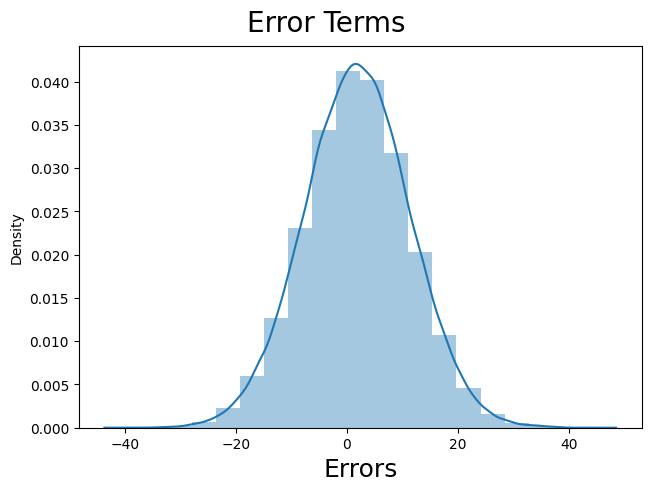

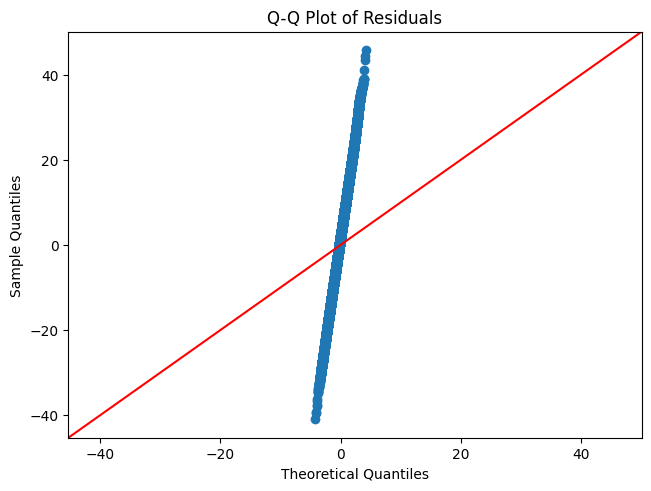

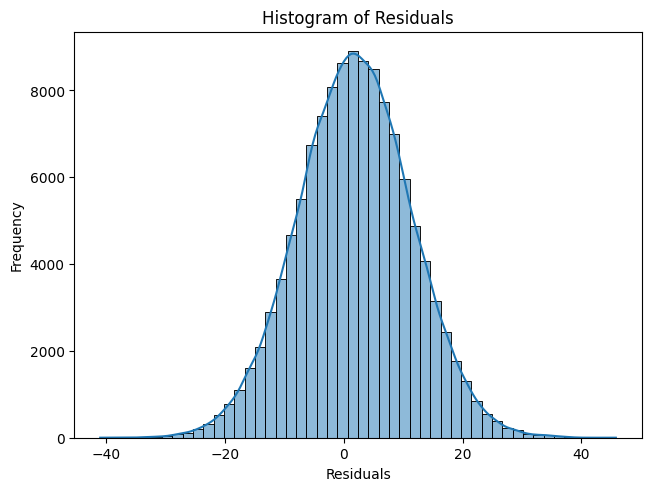

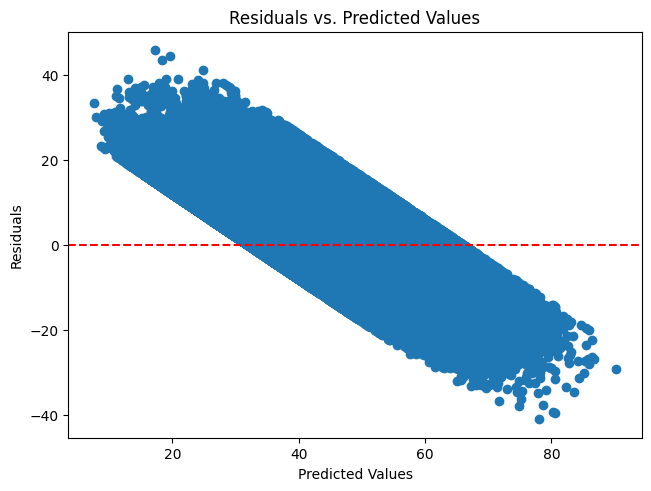

In [34]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

## Lets run predict
y_train_pred = lr_new.predict(X_train_new)

## Lets Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

residual_vals = y_train - y_train_pred
sm.qqplot(residual_vals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

sns.histplot(residual_vals, bins=50, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.scatter(y_train_pred, residual_vals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [35]:
import operator

# Compare the scaled vs unscaled features used in the final model

coeff_allFeatures = lr_new.params.to_dict()
#dict(sorted(lr_new.params.to_dict().items(),  key=operator.itemgetter(1), reverse=True))

## So far we did not build a model without scaled features
## Numeric features have been scaled
## Lets extract feature coefficients for scaled numeric features
coeff_sclaedNumFeatures1 = {key: coeff_allFeatures[key] for key in porter1_df_numcols if key in coeff_allFeatures}
coeff_sclaedNumFeatures = dict(sorted(coeff_sclaedNumFeatures1.items(), key=operator.itemgetter(1), reverse=True))
print (coeff_sclaedNumFeatures)
print (coeff_sclaedNumFeatures1)

## Categorical features were not scaled
## Lets extract feature coefficients for non-scaled categorical features
coeff_sclaedCatFeatures1 = {key: coeff_allFeatures[key] for key in porter1_df_catcols if key in coeff_allFeatures}
coeff_sclaedCatFeatures = dict(sorted(coeff_sclaedCatFeatures1.items(), key=operator.itemgetter(1), reverse=True))
print (coeff_sclaedCatFeatures)




{'distance': 45.559221092115294, 'subtotal': 28.185957296205817, 'total_outstanding_orders': 14.937250166886875, 'num_distinct_items': 1.6387618994895288}
{'subtotal': 28.185957296205817, 'num_distinct_items': 1.6387618994895288, 'total_outstanding_orders': 14.937250166886875, 'distance': 45.559221092115294}
{'market_id': 5.609785147773897, 'Hour_of_order': 5.140613475341391, 'order_protocol': 3.630432174417825, 'is_weekend': 3.598128513586665}


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [36]:
# Analyze the effect of a unit change in a feature, say 'total_items'

## Lets see coefficient of 'distance' feature in the last model
coeff_distance = coeff_sclaedNumFeatures['distance']
print ("Coefficient of distance feature : ",coeff_distance)
minval = porter1_df_train.distance.min()
maxval = porter1_df_train.distance.max()

print ("Min value of distance feature : ",minval)
print ("Max value of distance feature : ",maxval)
print ("Distance is scaled to range : (",minval," to ",maxval,")")

print ("For a one-unit increase in the scaled distance feature value, time_taken_for_delivery increases by ", coeff_distance);






Coefficient of distance feature :  45.559221092115294
Min value of distance feature :  0.0
Max value of distance feature :  1.0
Distance is scaled to range : ( 0.0  to  1.0 )
For a one-unit increase in the scaled distance feature value, time_taken_for_delivery increases by  45.559221092115294


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
* There are categorical variables in the dataset
* List of categorical variables
  * market_id
  * store_primary_category
  * order_protocol
  * Hour_of_order
  * Day_of_week
  * is_weekend
* Dependent variable is affected by Hour_of_order and Day_of_week



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
* test_size = 0.2 indicates , 20% of total dataset will be used as validation dataset (also called as test dataset)



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
* The numeric variables having considerable correlation with the target variable are as follows
  * distance
  * subtotal
  * total_outstanding_orders
  * num_distinct_items
* The categorical variables having considerable correlation with the target variable are as follows
  * is_weekend
* The numeric variables having weak correlation with the target variable are as follows
  * total_onshift_dashers
  * total_busy_dashers



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
* Used boxplots to visualize the outliers
* Steps to remove outliers are as follows
  * Calculated the 1st & 3rd quartile and iqr from quartiles
  * Calculate upper and lower bound values (thresholds)  
  * record from dataset having feature value <= lower threshold and  >=  upper bound/threshold are considered as an outlier and are removed



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
* The final model shows top 3 features affecting significantly is given below ( in order of significance)
  * distance
  * subtotal
  * total_outstanding_orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
* There are two types of Machine leaning algorithms - Supervised and unsupervised
* Regression algorithm is a  supervised machine learning algorithm
* Regression algorithms infers relationship between target variable/feature (feature to be predicted) and other independent features
* Simple linear regression - contains one target variable and one independent feature (y = mx+c)
* Multiple linear regression - contains one target variable and two or more independent feature (y = m0 + m1x1 + m2x2 + .. )  
* Linear regression algorithms application examples
  * Predict student marks
  * Predict if customer will buy specific house
  * Predict property pricing
  * Time required to deliver the order etc.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
* Simple linear regression - contains one target variable and one independent feature (y = mx+c)
* Multiple linear regression - contains one target variable and two or more independent feature (y = m0 + m1x1 + m2x2 + .. )



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
* Cost function can be used to identify how accurately model predicts value of the target variable
* Objective is to minimise cost function
* Commonly used cost function is - Mean Squared Error (MSE)
* Optimization algoritm such as Gradient Descent can be used to reduce cost function



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
* Overfitting -
  * Performs very well on training (or seen) dataset but performs poor on unseen data
  * Model memories records , they do not infer patterns/associations of features
  * Learns data very well including outliers
  * Models are too complex, gives high accuracy for trining data and low accuracy for testing data , shows high coefficient  
* Underfitting -
  * Performs poor on seen as well as unseen data
  * Model fails to capture patterns in training data
  * Models are  too simple , gives minimal accuracy(training and testing) and high error



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
* Residual shows how much predicted value of the target variable differs from actual value
* We can plot different types of residual plots. Such as
  * Residual distribution can be visualised in histogram plot. Normal distribution of residuals is ideal.
  * Quantile- Quantile plot can be used
  * Residual & predicted value plot may indicate patterns in residuals
* If there are outliers in the dataset then residual plots will indicate the same , it is recommended to remove the outliers and fit model again
* residual plots may hint wether the used model is suitable for the dataset